In [1]:
experimento = 'Experimento para entrenar un modelo que se ha entrneado en dos partes, con todos los datos y luego con solo las clases problematicas'

In [3]:
#Importamos las librerias necesarias
import torch
import numpy as np
import pandas as pd
import Modulo_MLP
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
def evaluate_aux(model, test_loader):
        """
        Evalua el modelo previamente entrnado
        Argumentos de entrada: modelo, conjunto de test
        """
        model.eval()
        model.to(device)
        acc = []
        with torch.no_grad():
            for batch in test_loader:
                X, y = batch
                y_hat = model(X.float())
                acc.append((y == torch.argmax(y_hat, axis=1)).sum().item() / len(y))

        return np.mean(acc)


In [5]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
#Cargamos el data set
data = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')

#Elimino las filas con algún valor de columna vacio 
data = data.dropna()

In [2]:
print(f'\033[5;35m EXPERIMENTO --> {experimento} \033[0;m')

 EXPERIMENTO --> Experimento para entrenar un modelo que se ha entrneado en dos partes, con todos los datos y luego con solo las clases problematicas 


In [8]:
#hyper parameters
    #Numero de muestras del todo el dataset, numero de entradas de la red, numero de clases a clasificar, 
    # numero de neuronas en la capa oculta, numero de epocas, numero de lotes, tasa de aprendizaje, k del K-Fold

nTest = 0.2   
nSamples = 120000

nTrain = 1-nTest
nSamples =  round(nSamples / nTrain)

input_size = 38
num_classes = 12

hidden_size = 100
num_epochs = 500
batch_size = 256
learning_rate = 0.01

num_splits = 10

class_names = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
                'Up by elevator',  'Down by elevator'] 
labels = [1,2,3,4,5,6,7,8,10,11]

In [9]:
# Obtengo un subconjunto del data set original 
# TODO Conocer la distribución de cada clase 
df = data
df = df[nSamples:(nSamples+20000)]

In [10]:
# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 10) | (df.act == 11)]
# # Elimino las muesta correpondientes a las actividades subir y bajar ascensor(10, 11)

# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 9) | (df.act == 12)]

# df = df[(df.act == 8) | (df.act == 10) | (df.act == 11)]

In [11]:
#Divido el conjunto de muestras en variable clasificatoria(y) y las demas(X)

X = df.drop(['act'], axis = 'columns')
# X.head()

y = df.act
# y.head()

num of samples: 20000
[5556, 1192, 2404, 2101, 1405, 318, 354, 3879, 0, 1577, 1214, 0]


<BarContainer object of 12 artists>

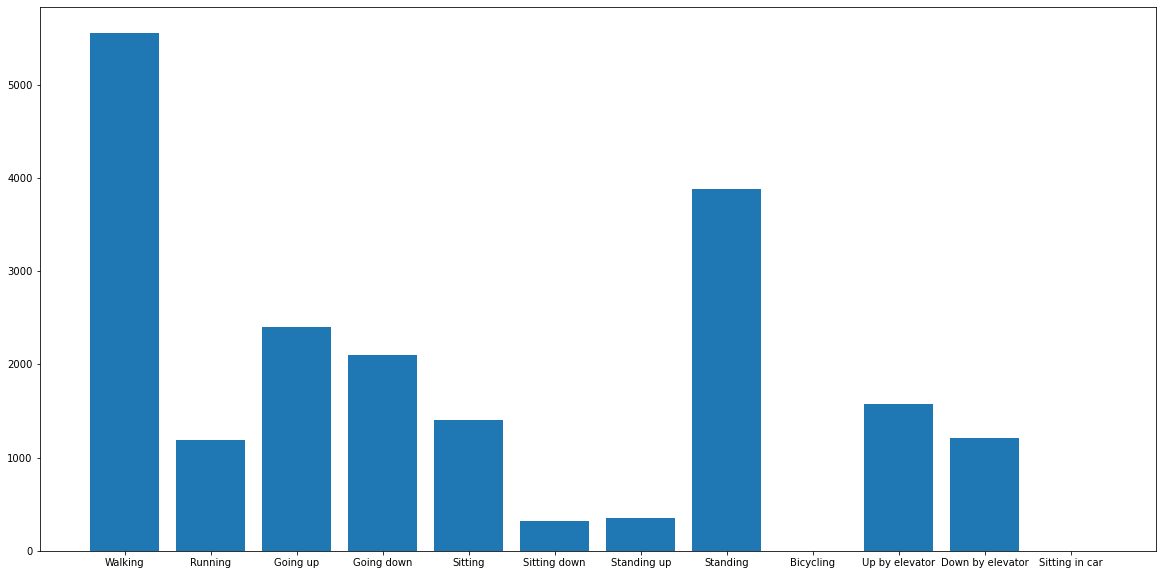

In [12]:
x_values =  ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
               'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car', ] 
y_values = []
y_values.append((df[(df.act == 1)]).shape[0])
y_values.append((df[(df.act == 2)]).shape[0])
y_values.append((df[(df.act == 3)]).shape[0])
y_values.append((df[(df.act == 4)]).shape[0])
y_values.append((df[(df.act == 5)]).shape[0])
y_values.append((df[(df.act == 6)]).shape[0])
y_values.append((df[(df.act == 7)]).shape[0])
y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 9)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
y_values.append((df[(df.act == 12)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width=0.8)                

In [13]:
# # Porcentaje de cada clase en un conjunto de datos
# s = sum(y_values)
# w = 0
# for x in y_values:
#     y = x * 100
#     z = y / s
#     w = w + z
#     print(f'La muestra es {x} y su porcentaje es {z}')
# print(f'Total: {w}')

In [14]:
#Obtengo los valores de los conjuntos anteriores
X_val = X.values
y_val = y.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val,test_size=nTest, random_state=0)

In [16]:
X_tensor = torch.tensor(X_test).cuda()
y_tensor = torch.tensor(y_test).cuda()
testset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [17]:
# #'modelo_final_'+str(now.date())+'_'+str(round(acc_test, 4))+'_Train'+'.zip'
modelo_pre_train = torch.jit.load('modelo_final_2021-09-01_0.5897_Train_pt_2.zip')
print(f'\033[1;36mPrecisión del modelo con doble entreno y observaciones nunca vistas --> {evaluate_aux(modelo_pre_train, test_loader)} \033[0;m')

# modelo_pre_train = None

Precisión del modelo con doble entreno y observaciones nunca vistas --> 0.221044921875 


  0%|          | 0/500 [00:00<?, ?it/s]

######### Launch with 150000 Samples, 500 Epochs, 256      Batch, 10 Splits, 12 Class, 100 Hidden neurons ######### 
Entro en modelo preentrnado


loss 0.38856 acc 0.72854:  62%|██████▏   | 310/500 [04:31<02:49,  1.12it/s]

OVERFFITING|Epochs: 310/500|Loss test old: 0.8229721355813|loss test new: 0.8230664663875158


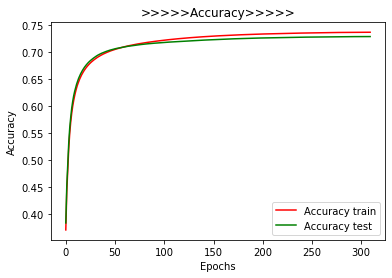

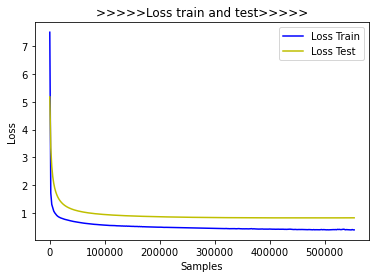

Accuracy de validación con kFold 0.7338169642857143
Accuracy Train: 0.7391875 
Accuracy Test: 0.72825 
Diferencia entre train y test: 0.010937500000000044

 


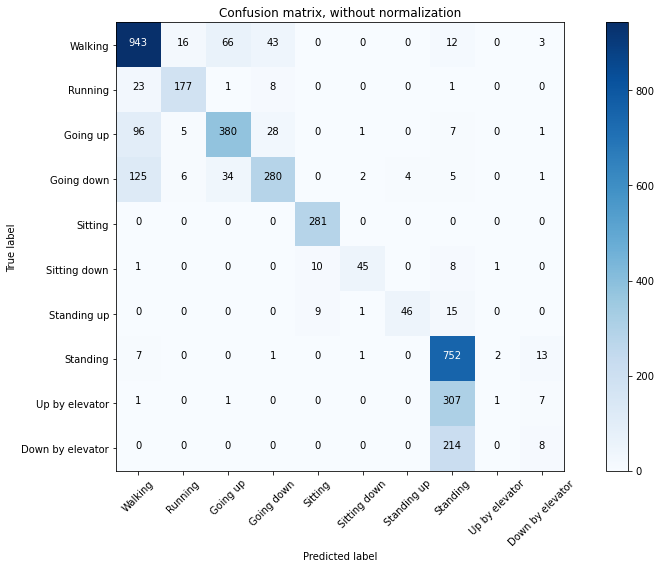

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.37830 acc 0.72799:  14%|█▍        | 70/500 [01:01<06:08,  1.17it/s] 

OVERFFITING|Epochs: 70/500|Loss test old: 0.8524790922060269|loss test new: 0.8527272550427184


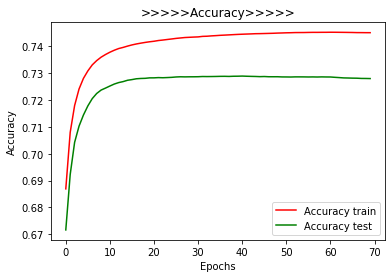

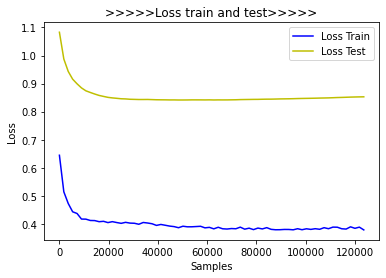

Accuracy de validación con kFold 0.7307477678571428
Accuracy Train: 0.7413125 
Accuracy Test: 0.7275 
Diferencia entre train y test: 0.013812500000000005

 


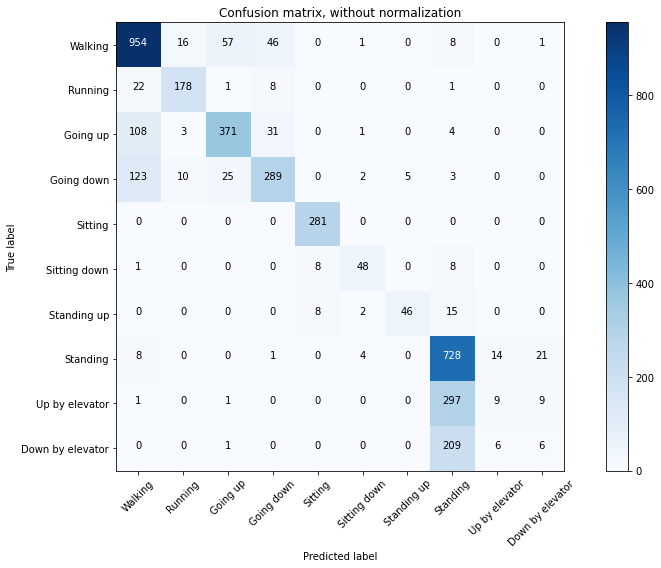

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


OVERFFITING|Epochs: 90/500|Loss test old: 0.7417355776789866|loss test new: 0.7419323281163261


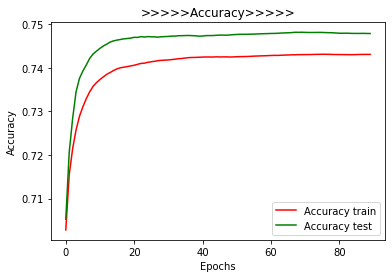

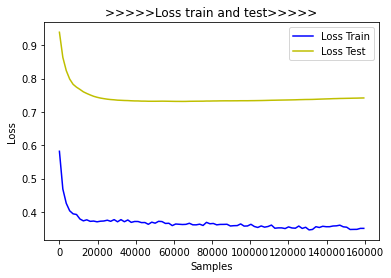

Accuracy de validación con kFold 0.7347470238095237
Accuracy Train: 0.7373125 
Accuracy Test: 0.71725 
Diferencia entre train y test: 0.020062499999999983

 


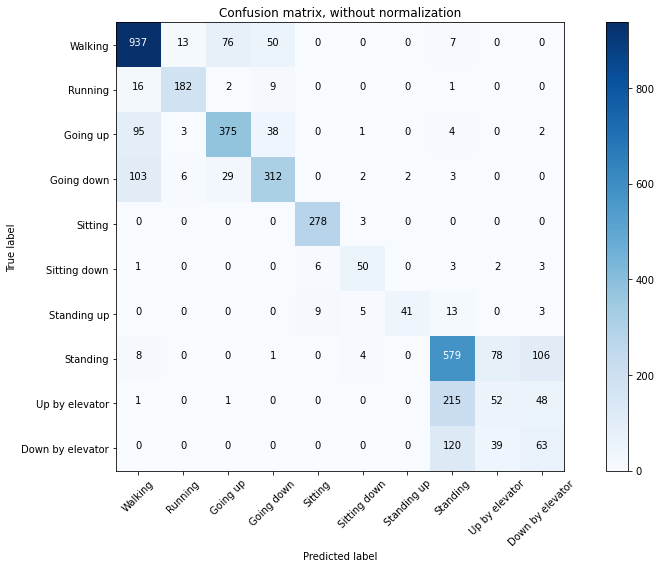

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.33880 acc 0.72956:  14%|█▍        | 70/500 [01:00<06:09,  1.16it/s]

OVERFFITING|Epochs: 70/500|Loss test old: 0.9788183700100482|loss test new: 0.9793794604588528


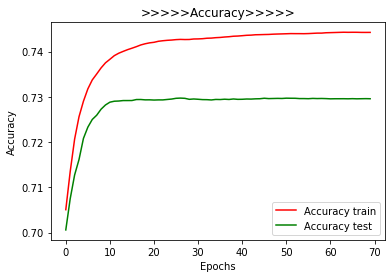

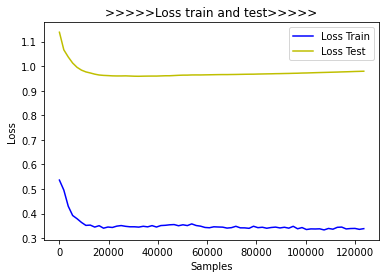

Accuracy de validación con kFold 0.7333984375
Accuracy Train: 0.746 
Accuracy Test: 0.73575 
Diferencia entre train y test: 0.010249999999999981

 


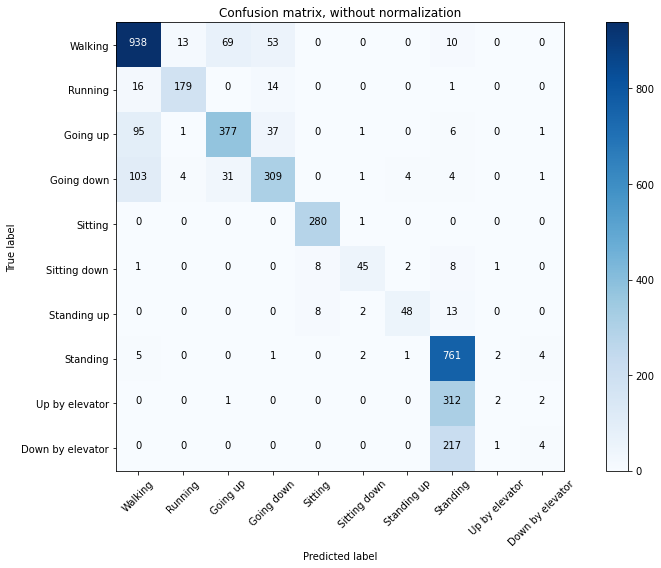

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.31792 acc 0.75003:  18%|█▊        | 90/500 [01:18<05:59,  1.14it/s]

OVERFFITING|Epochs: 90/500|Loss test old: 0.9315937566623259|loss test new: 0.9318415031073586


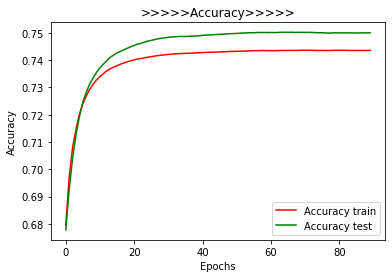

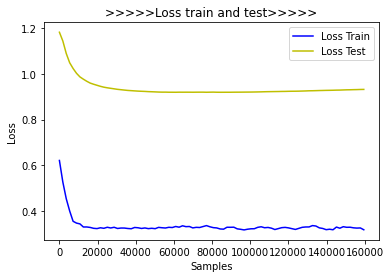

Accuracy de validación con kFold 0.7370535714285714
Accuracy Train: 0.74575 
Accuracy Test: 0.733 
Diferencia entre train y test: 0.012750000000000039

 


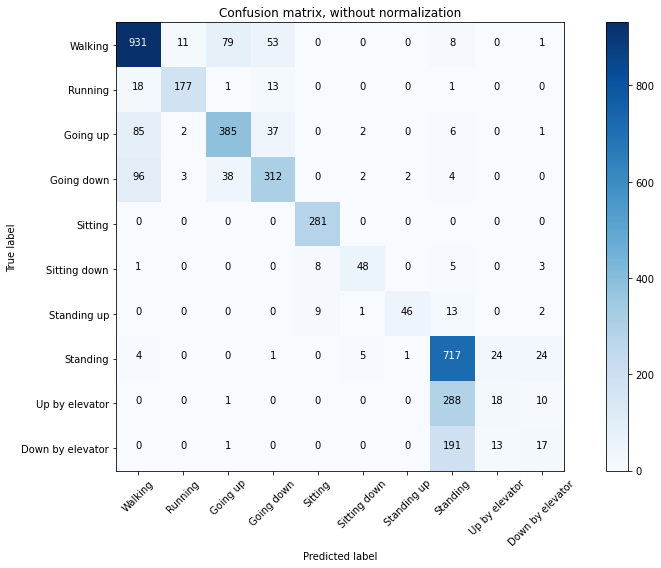

Entro en modelo preentrnado


loss 0.32864 acc 0.74284:  24%|██▍       | 120/500 [01:46<05:33,  1.14it/s]

OVERFFITING|Epochs: 120/500|Loss test old: 0.9076781210993805|loss test new: 0.9078532107883975


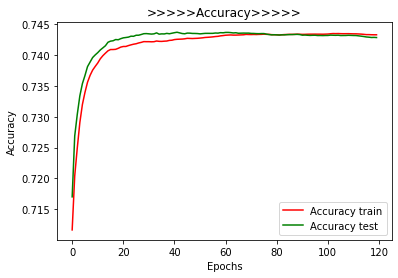

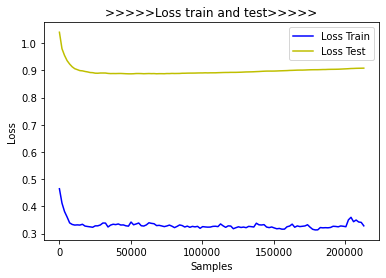

Accuracy de validación con kFold 0.7370721726190476
Accuracy Train: 0.7435625 
Accuracy Test: 0.73075 
Diferencia entre train y test: 0.012812500000000004

 


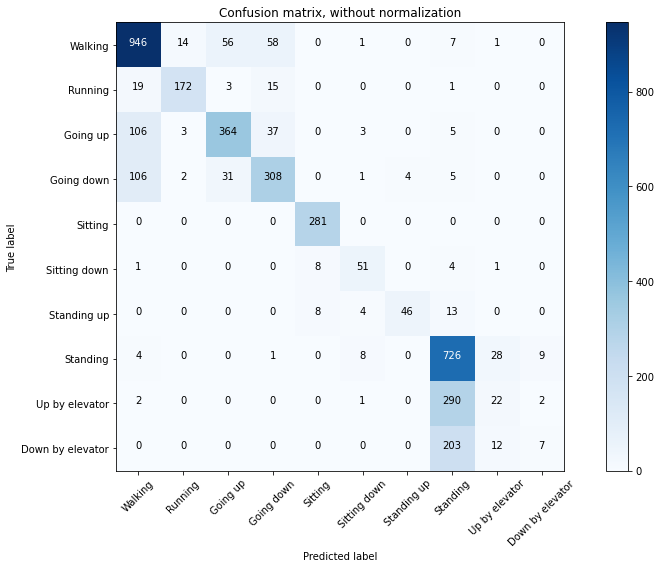

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.30996 acc 0.74299:  16%|█▌        | 80/500 [01:09<06:01,  1.16it/s] 

OVERFFITING|Epochs: 80/500|Loss test old: 0.9867587546543446|loss test new: 0.9870524319154875


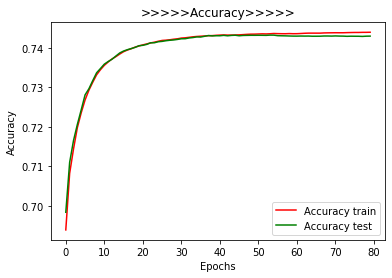

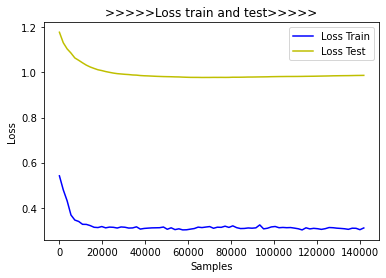

Accuracy de validación con kFold 0.7378029336734694
Accuracy Train: 0.7448125 
Accuracy Test: 0.73275 
Diferencia entre train y test: 0.012062499999999976

 


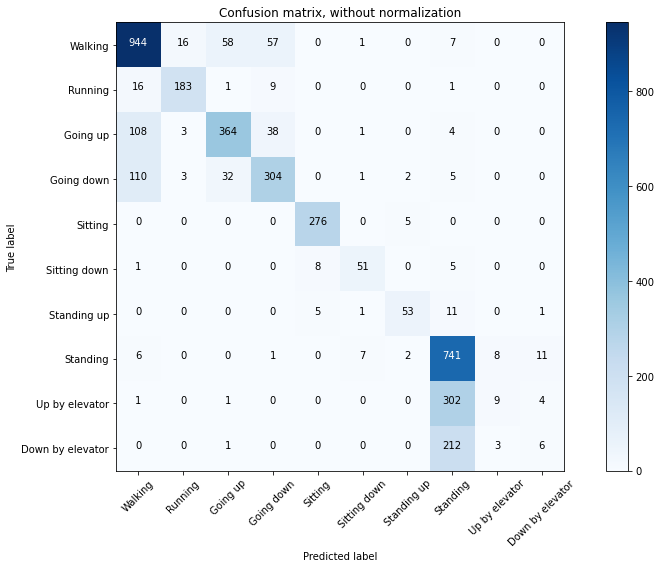

Entro en modelo preentrnado


loss 0.29894 acc 0.73953:  24%|██▍       | 120/500 [01:43<05:28,  1.16it/s]

OVERFFITING|Epochs: 120/500|Loss test old: 1.115115271431773|loss test new: 1.1155070344252245


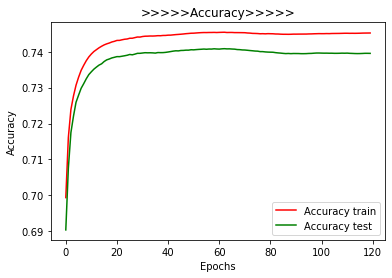

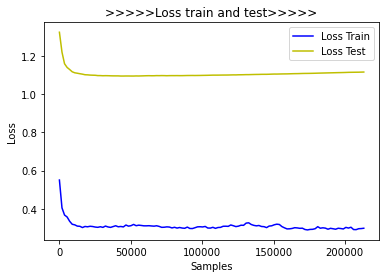

Accuracy de validación con kFold 0.73779296875
Accuracy Train: 0.7475625 
Accuracy Test: 0.73175 
Diferencia entre train y test: 0.015812500000000007

 


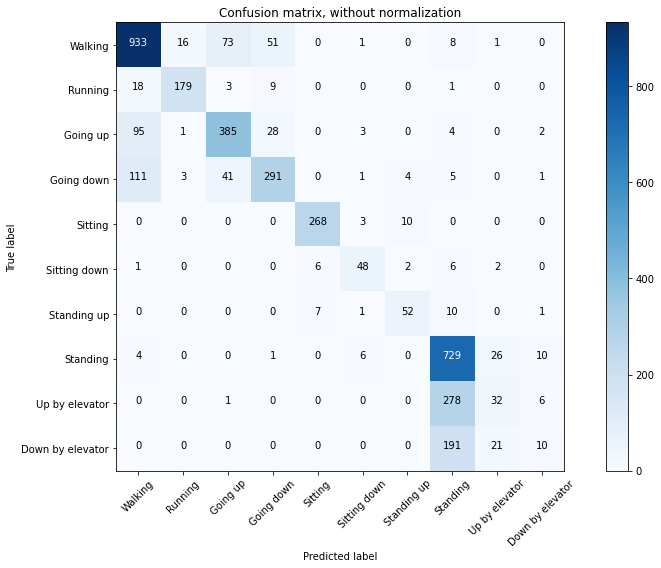

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.28080 acc 0.73279:  22%|██▏       | 110/500 [01:34<05:32,  1.17it/s]

OVERFFITING|Epochs: 110/500|Loss test old: 1.1696121672346582|loss test new: 1.1699231178729566


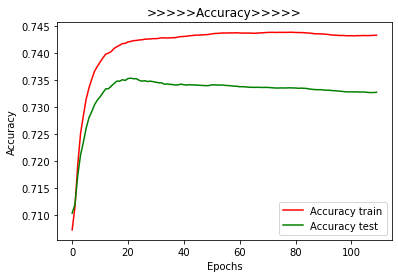

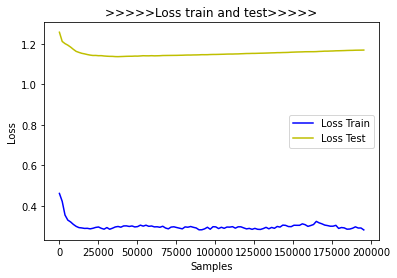

Accuracy de validación con kFold 0.7378472222222222
Accuracy Train: 0.745625 
Accuracy Test: 0.73275 
Diferencia entre train y test: 0.01287499999999997

 


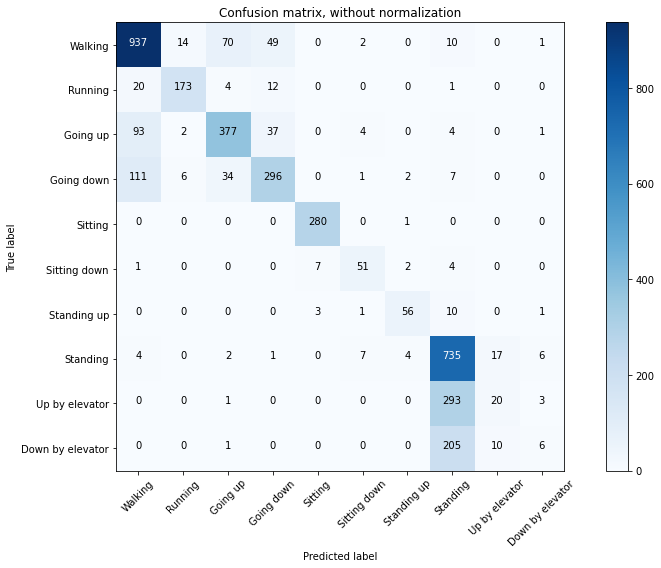

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.29516 acc 0.74360:  26%|██▌       | 130/500 [01:52<05:17,  1.16it/s]

OVERFFITING|Epochs: 130/500|Loss test old: 1.0974606508894484|loss test new: 1.097649295415197


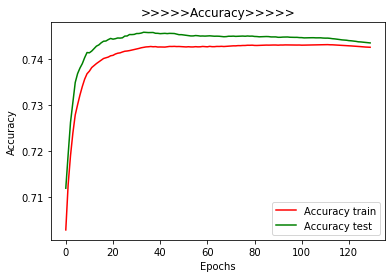

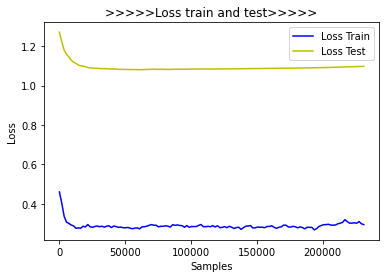

Accuracy de validación con kFold 0.7380022321428571
Accuracy Train: 0.737875 
Accuracy Test: 0.72075 
Diferencia entre train y test: 0.017124999999999946

 


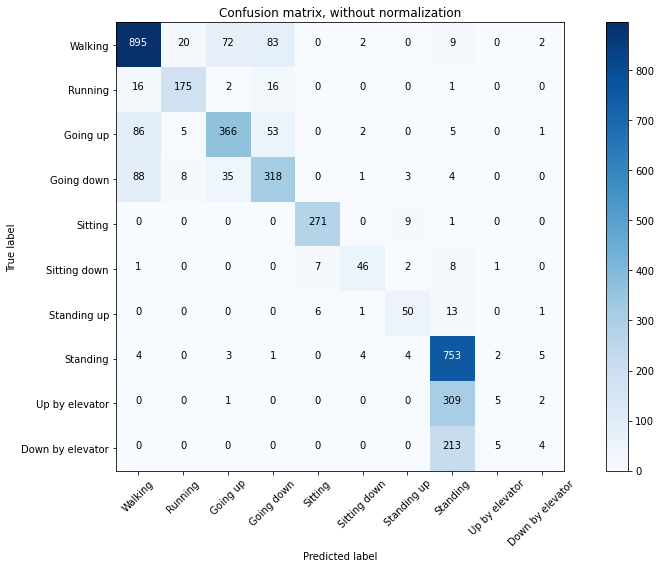

Time: 17m 51.265625s


In [18]:
print(f'\033[1;36m######### Launch with {nSamples} Samples, {num_epochs} Epochs, {batch_size}\
      Batch, {num_splits} Splits, {num_classes} Class, {hidden_size} Hidden neurons ######### \033[0;m')
#  Llamo al metodo que implementa el K-fold
time_mean, modelo_trained, loss_test_list, list_acc_test = Modulo_MLP.CV_Kfold(device, num_classes, input_size, X_train, 
                                                               y_train,hidden_size,num_splits,batch_size,num_epochs,
                                                               learning_rate, (X_test, y_test), modelo_pre_train, class_names, labels)

In [19]:
# Calacular el accuracy de test con un conjunto nunca antes visto 
d = data[800000:900000]

# d = d[(d.act == 1) | (d.act == 2) | (d.act == 3) | (d.act == 4) | (d.act == 5) | (d.act == 6) | (d.act == 7) 
#         | (d.act == 8) | (d.act == 9) | (d.act == 12)]

X_t = d.drop(['act'], axis = 'columns')
y_t = d.act

Xt_tensor = torch.tensor(X_t.values).cuda()

yt_tensor = torch.tensor(y_t.values).cuda()

testset = torch.utils.data.TensorDataset(Xt_tensor,  yt_tensor)
test_loader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False)

accuracy_test = Modulo_MLP.evaluate(modelo_trained.to(device),test_loader)
print(f'Accuracy de test {accuracy_test}')


# #Guardo el modelo con el accuracy de tes
# # Scripting load
# acc_label = evaluate_aux(modelo_trained.to(device), test_loader)
# scripted_model_final = torch.jit.script(modelo_trained.cpu())
# # Scripting save
# from datetime import datetime
# now = datetime.now()
# scripted_model_final.save('modelo_final_'+str(now.date())+'_'+str(round(acc_label, 4))+'_Test'+'.zip')

Accuracy de test 0.7261948529411765


In [20]:
#Libera toda la memoria caché no utilizada de PyTorch
torch.cuda.empty_cache()